In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("USA_Housing.csv")


In [4]:
data.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [7]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


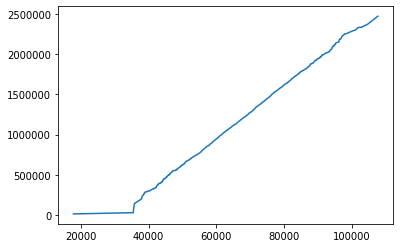

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.sort(data["Avg. Area Income"]),np.sort(data["Price"]))
plt.show()


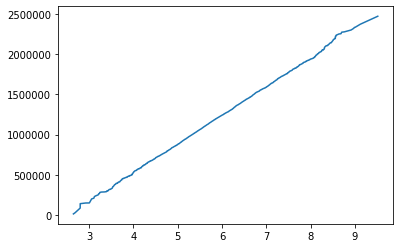

In [16]:
import matplotlib.pyplot as plt
plt.plot(np.sort(data["Avg. Area House Age"]),np.sort(data["Price"]))
plt.show()

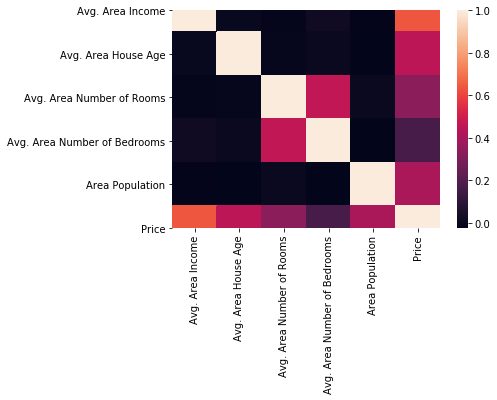

In [18]:
import seaborn as sns
sns.heatmap(data.corr(),xticklabels=data.corr().columns,yticklabels=data.corr().columns)
plt.show()

In [20]:
from sklearn import linear_model

In [130]:
rgr=linear_model.LinearRegression()
rgr1=linear_model.Lasso(alpha=0.0001)
rgr2=linear_model.Ridge(alpha=0.00000000000000000000000000001)
from sklearn import model_selection
x=data[["Avg. Area Income","Avg. Area House Age","Area Population","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms"]]
y=data["Price"]

In [131]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=101)


In [132]:
rgr.fit(x_train,y_train)
rgr1.fit(x_train,y_train)
rgr2.fit(x_train,y_train)


Ridge(alpha=1e-29, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
z=rgr.predict(x_test)
z1=rgr1.predict(x_test)
z2=rgr2.predict(x_test)

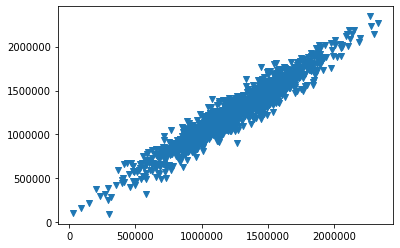

In [134]:
plt.scatter(y_test,z,marker="v")
plt.show()

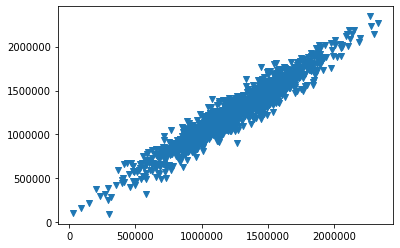

In [135]:
plt.scatter(y_test,z1,marker="v")
plt.show()

In [136]:

print(rgr.coef_)
print(rgr1.coef_)
print(rgr2.coef_)

[2.16378083e+01 1.64890446e+05 1.52496030e+01 1.21297153e+05
 1.81458942e+03]
[2.16378083e+01 1.64890446e+05 1.52496030e+01 1.21297153e+05
 1.81458939e+03]
[2.16378083e+01 1.64890446e+05 1.52496030e+01 1.21297153e+05
 1.81458942e+03]


In [137]:
print(rgr.intercept_)
print(rgr1.intercept_)
print(rgr2.intercept_)

-2643144.2175845606
-2643144.2162399692
-2643144.217582684


In [138]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,z))
print(metrics.mean_absolute_error(y_test,z1))
print(metrics.mean_absolute_error(y_test,z2))

81877.46809002108
81877.46808871874
81877.46809001947


In [139]:
print(metrics.mean_squared_error(y_test,z))
print(metrics.mean_squared_error(y_test,z1))
print(metrics.mean_squared_error(y_test,z2))

10364756049.540424
10364756049.493616
10364756049.538454


In [140]:
print(np.sqrt(metrics.mean_squared_error(y_test,z)))
print(np.sqrt(metrics.mean_squared_error(y_test,z1)))
print(np.sqrt(metrics.mean_squared_error(y_test,z2)))

101807.44594350859
101807.44594327871
101807.44594349891
